<a href="https://colab.research.google.com/github/UttaraKet1607/DASSA_Hackathon2/blob/main/DASSA_Hackathon2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
df = pd.read_csv('/content/train_data.csv')

In [109]:
df

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,...,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,Good/Bad,timestamp
0,1,1,-0.0007,-0.0004,100,518.67,14.62,21.61,1.3,47.47,...,8138.62,8.4195,0.03,392,2388,100,39.06,23.419,0,3/1/2020 0:00
1,1,2,0.0019,-0.0003,100,518.67,14.62,21.61,1.3,47.49,...,8131.49,8.4318,0.03,392,2388,100,39,23.4236,0,3/1/2020 0:05
2,1,3,-0.0043,0.0003,100,518.67,14.62,21.61,1.3,47.27,...,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,0,3/1/2020 0:10
3,1,4,0.0007,0,100,518.67,14.62,21.61,1.3,47.13,...,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,0,3/1/2020 0:15
4,1,5,-0.0019,-0.0002,100,518.67,14.62,21.61,1.3,47.28,...,8133.8,8.4294,0.03,393,2388,100,38.9,23.4044,0,3/1/2020 0:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,82,122,-0.0001,0.0002,100,518.67,14.62,21.61,1.3,47.48,...,8163.51,8.4098,0.03,392,2388,100,38.88,23.3777,0,4/27/2020 6:55
16500,82,123,0.0016,0.0002,100,518.67,14.62,21.6,1.3,47.15,...,8153.63,8.3746,0.03,392,2388,100,38.89,23.3542,0,4/27/2020 7:00
16501,82,124,Missing,-0.0005,100,518.67,14.62,21.61,1.3,47.48,...,8162.75,8.414,0.03,391,2388,100,38.9,23.3692,0,4/27/2020 7:05
16502,82,125,0.0001,-0.0002,100,518.67,14.62,21.6,1.3,47.12,...,8150.24,8.4058,0.03,391,2388,100,38.99,23.4025,0,4/27/2020 7:10


In [110]:
df.shape

(16504, 22)

In [111]:
df.columns

Index(['Period Code', 'Cycle ID', 'B_2', 'B_3', 'B_4', 'B_5', 'B_9', 'B_10',
       'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'B_21', 'B_22',
       'B_23', 'B_24', 'B_25', 'Good/Bad', 'timestamp'],
      dtype='object')

In [112]:
df.dtypes

Period Code    object
Cycle ID       object
B_2            object
B_3            object
B_4            object
B_5            object
B_9            object
B_10           object
B_14           object
B_15           object
B_16           object
B_17           object
B_18           object
B_19           object
B_20           object
B_21           object
B_22           object
B_23           object
B_24           object
B_25           object
Good/Bad       object
timestamp      object
dtype: object

In [113]:
df.isnull().sum()

Period Code    29
Cycle ID       36
B_2            40
B_3            44
B_4            42
B_5            35
B_9            29
B_10           44
B_14           44
B_15           46
B_16           37
B_17           41
B_18           35
B_19           37
B_20           40
B_21           29
B_22           27
B_23           31
B_24           41
B_25           37
Good/Bad       39
timestamp       0
dtype: int64

In [114]:
df_filtered = df.drop(["Period Code", "Cycle ID", "B_4", "B_5", "B_9", "B_10", "B_14","B_20", "B_22", "B_23"], axis=1)
df_filtered.head()

,B_2,B_3,B_15,B_16,B_17,B_18,B_19,B_21,B_24,B_25,Good/Bad,timestamp
0,-0.0007,-0.0004,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.419,0,3/1/2020 0:00
1,0.0019,-0.0003,47.49,522.28,2388.07,8131.49,8.4318,392,39,23.4236,0,3/1/2020 0:05
2,-0.0043,0.0003,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0,3/1/2020 0:10
3,0.0007,0,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0,3/1/2020 0:15
4,-0.0019,-0.0002,47.28,522.19,2388.04,8133.8,8.4294,393,38.9,23.4044,0,3/1/2020 0:20


In [115]:
outliers = ['Bad', 'no connection', 'stop', 'Missing', 'start', 'No data', 'No Data', 'no connection', 'I/O', 'no response', 'NaN']

In [116]:
column_list = ["B_2", "B_3","B_15", "B_16", "B_17", "B_18", "B_19", "B_21", "B_24", "B_25", "Good/Bad"]
for i in column_list:
  for j in outliers:
    df_filtered.loc[df_filtered[i] == j, i] = np.nan
  df_filtered[i].fillna(method = "ffill", inplace=True)
  print(df_filtered[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0


In [117]:
(df_filtered["B_2"] == "Bad").sum()

0

In [118]:
df_filtered.shape

(16504, 12)

In [119]:
numeric_columns = ["B_2", "B_3","B_15", "B_16", "B_17", "B_18", "B_19", "B_21", "B_24", "B_25", "Good/Bad"]

for i in numeric_columns:
  df_filtered[i] = pd.to_numeric(df_filtered[i])

df_filtered.dtypes

B_2          float64
B_3          float64
B_15         float64
B_16         float64
B_17         float64
B_18         float64
B_19         float64
B_21           int64
B_24         float64
B_25         float64
Good/Bad       int64
timestamp     object
dtype: object

KeyboardInterrupt: ignored

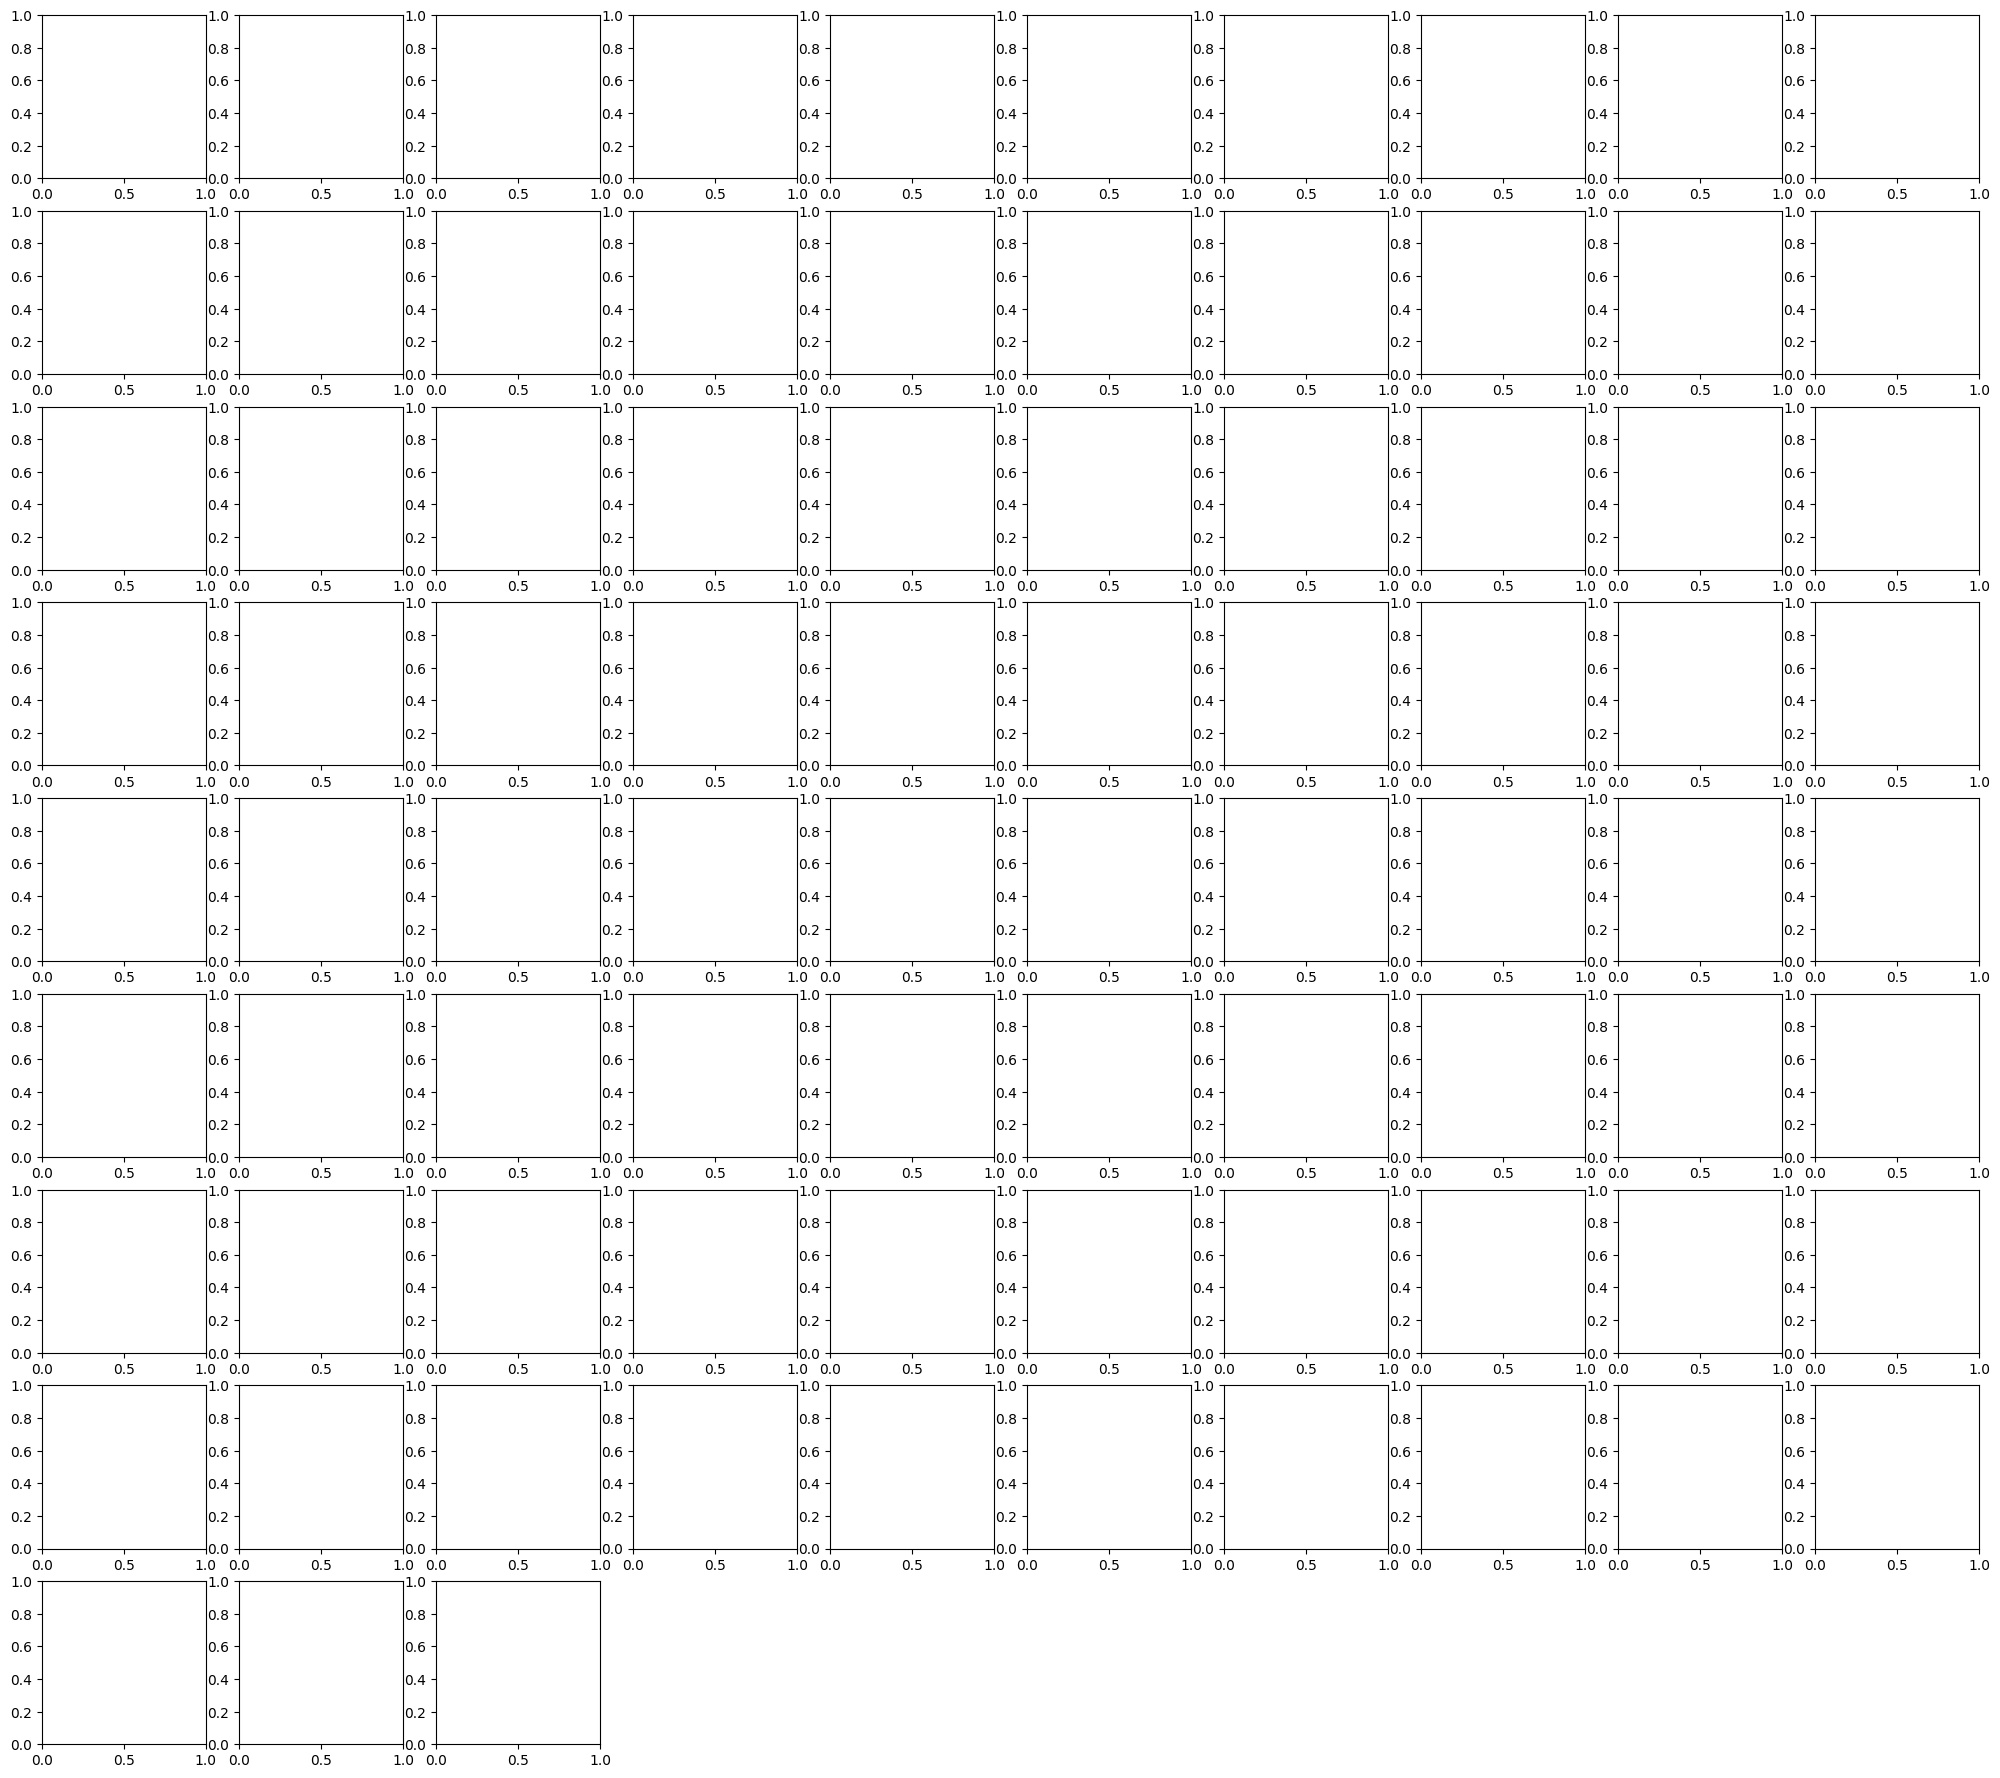

In [120]:
sns.pairplot(df_filtered, hue = "Good/Bad")